In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec


In [2]:
cleaned_campaign_df = pd.read_csv('Resources/campaign.csv')

cleaned_campaign_df.head(5)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_ids
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,2020-06-20 05:00:00,2021-01-30 06:00:00,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,2020-11-29 06:00:00,2021-06-11 05:00:00,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process impro...,142400.0,21307.0,failed,296,US,USD,2020-05-05 05:00:00,2021-05-30 05:00:00,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,2021-01-29 06:00:00,2021-02-13 06:00:00,cat1,subcat1


# CHARTS

In [44]:
# Create gridspec for the main panel
gs = GridSpec(2, 2)
main_panel = plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

In [45]:
sns.set_palette("mako",4)

Text(0.5, 1.0, 'Campaign Outcomes')

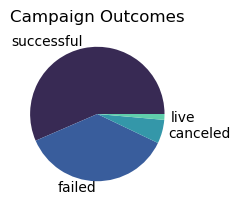

In [50]:
# Chart 1
fig1 = plt.figure()
ax1 = fig1.add_subplot(gs[0, 0])
outcome_counts = cleaned_campaign_df['outcome'].value_counts()
ax1.pie(outcome_counts, labels=outcome_counts.index)
ax1.set_title('Campaign Outcomes')

(0.0, 2000.0)

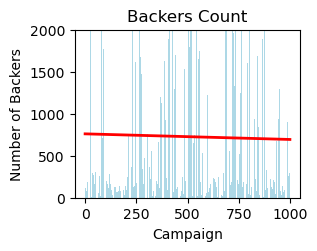

In [35]:
# Chart 2
fig2 = plt.figure()
ax2 = fig2.add_subplot(gs[0, 1])
backers_counts = cleaned_campaign_df['backers_count']
x = np.arange(len(backers_counts))

ax2.bar(x, backers_counts, color='lightblue')
ax2.set_xlabel('Campaign')
ax2.set_ylabel('Number of Backers')
ax2.set_title('Backers Count')

z = np.polyfit(x, backers_counts, 1)
p = np.poly1d(z)
ax2.plot(x, p(x), color='red', linewidth=2)

ax2.set_ylim(top=2000)

C:\Users\MOTHERSHIP\AppData\Local\Temp\ipykernel_21880\1610747834.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(category_counts.index, rotation=90)


[Text(0, 0, 'cat4'),
 Text(1, 0, 'cat5'),
 Text(2, 0, 'cat2'),
 Text(3, 0, 'cat3'),
 Text(4, 0, 'cat6'),
 Text(5, 0, 'cat7'),
 Text(6, 0, 'cat1'),
 Text(7, 0, 'cat8'),
 Text(8, 0, 'cat9')]

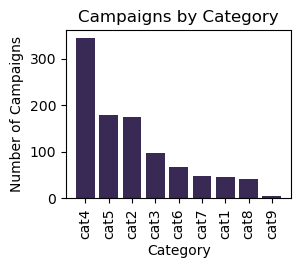

In [36]:
# Charts 3 and 4
fig3 = plt.figure()
ax3 = fig3.add_subplot(gs[1, 0])
category_counts = cleaned_campaign_df['category_id'].value_counts()
ax3.bar(category_counts.index, category_counts)
ax3.set_xlabel('Category')
ax3.set_ylabel('Number of Campaigns')
ax3.set_title('Campaigns by Category')
ax3.set_xticklabels(category_counts.index, rotation=90)


C:\Users\MOTHERSHIP\AppData\Local\Temp\ipykernel_21880\3701557998.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(subcategory_counts.index, rotation=90)


[Text(0, 0, 'subcat4'),
 Text(1, 0, 'subcat2'),
 Text(2, 0, 'subcat5'),
 Text(3, 0, 'subcat3'),
 Text(4, 0, 'subcat1'),
 Text(5, 0, 'subcat8'),
 Text(6, 0, 'subcat9'),
 Text(7, 0, 'subcat15'),
 Text(8, 0, 'subcat7'),
 Text(9, 0, 'subcat12'),
 Text(10, 0, 'subcat11'),
 Text(11, 0, 'subcat10'),
 Text(12, 0, 'subcat19'),
 Text(13, 0, 'subcat6'),
 Text(14, 0, 'subcat18'),
 Text(15, 0, 'subcat20'),
 Text(16, 0, 'subcat14'),
 Text(17, 0, 'subcat13'),
 Text(18, 0, 'subcat23'),
 Text(19, 0, 'subcat21'),
 Text(20, 0, 'subcat16'),
 Text(21, 0, 'subcat17'),
 Text(22, 0, 'subcat24'),
 Text(23, 0, 'subcat22')]

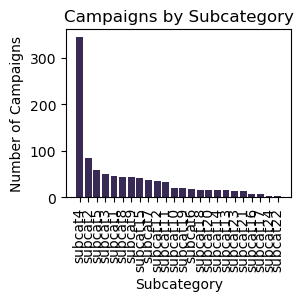

In [42]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(gs[1, 1])
subcategory_counts = cleaned_campaign_df['subcategory_ids'].value_counts()
ax4.bar(subcategory_counts.index, subcategory_counts)
ax4.set_xlabel('Subcategory')
ax4.set_ylabel('Number of Campaigns')
ax4.set_title('Campaigns by Subcategory')
ax4.set_xticklabels(subcategory_counts.index, rotation=90)

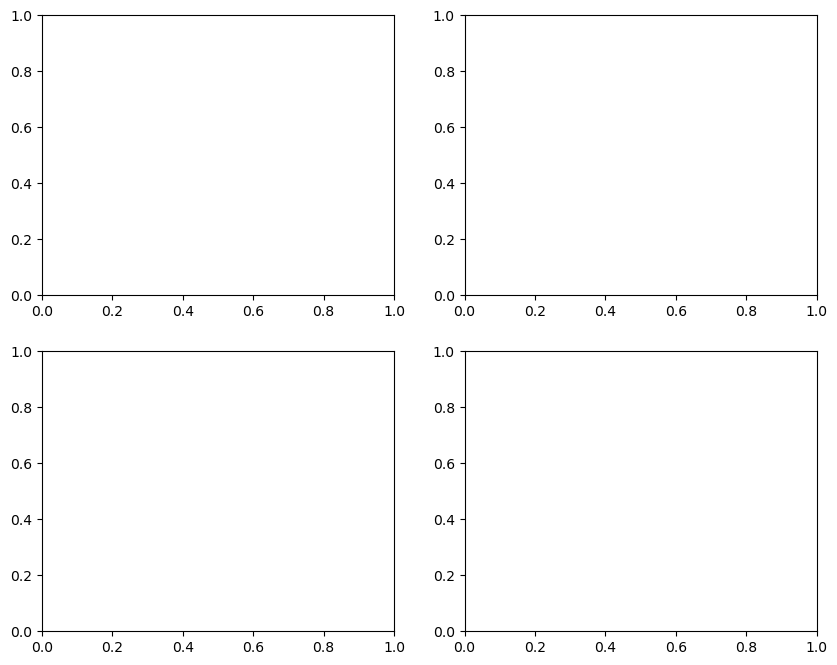

In [38]:
# Combine the figures into a main panel
main_panel = plt.figure(figsize=(10, 8))
ax_main = main_panel.subplots(2, 2)

In [43]:
# Place the individual charts in the main panel
ax_main[0, 0] = main_panel.add_subplot(ax1.get_position())
ax_main[0, 1] = main_panel.add_subplot(ax2.get_position())
ax_main[1, 0] = main_panel.add_subplot(ax3.get_position())
ax_main[1, 1] = main_panel.add_subplot(ax4.get_position())

In [40]:
# Adjust the layout and spacing between subplots in the main panel
main_panel.tight_layout()


C:\Users\MOTHERSHIP\AppData\Local\Temp\ipykernel_21880\3222751823.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  main_panel.tight_layout()


In [41]:
# Display the main panel
plt.show()

In [21]:
# Convert the 'launched_date' and 'end_date' columns to datetime if needed
cleaned_campaign_df['launched_date'] = pd.to_datetime(cleaned_campaign_df['launched_date'])
cleaned_campaign_df['end_date'] = pd.to_datetime(cleaned_campaign_df['end_date'])

# Group the data by year and quarter
grouped_launched = cleaned_campaign_df.groupby(pd.Grouper(key='launched_date', freq='Q')).size()
grouped_end = cleaned_campaign_df.groupby(pd.Grouper(key='end_date', freq='Q')).size()


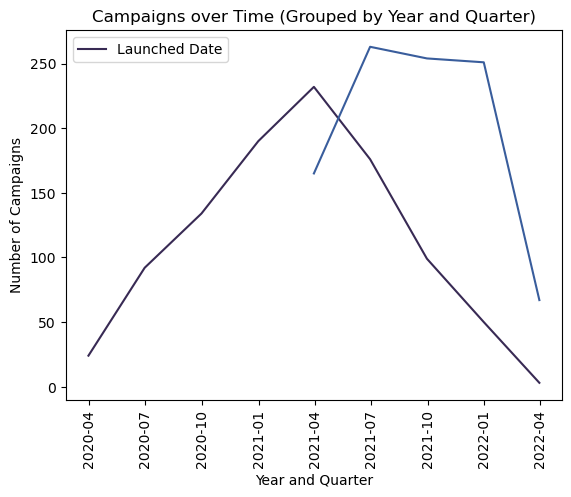

In [24]:
# Chart 5

sns.lineplot(data=grouped_launched)
sns.lineplot(data=grouped_end)

plt.xlabel('Year and Quarter')
plt.ylabel('Number of Campaigns')
plt.title('Campaigns over Time (Grouped by Year and Quarter)')

plt.legend(['Launched Date'])

plt.xticks(rotation='vertical')

plt.show()